# Customer segmentation and sentiment analysis

An analysis of customer segmentation and reviews from a fictitious toys and games company.

# A) Data cleaning and initial analysis on customer loyalty

## 1. Load and explore the data

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews = reviews.rename(columns={"remuneration (k£)": "remuneration", "spending_score (1-100)": "spending_score"})

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression to determine relationships between loyalty and other variables

### 5a) spending vs loyalty

In [10]:
# Independent variable.
x = reviews['spending_score']

# Dependent variable.
y = reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        13:15:19   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

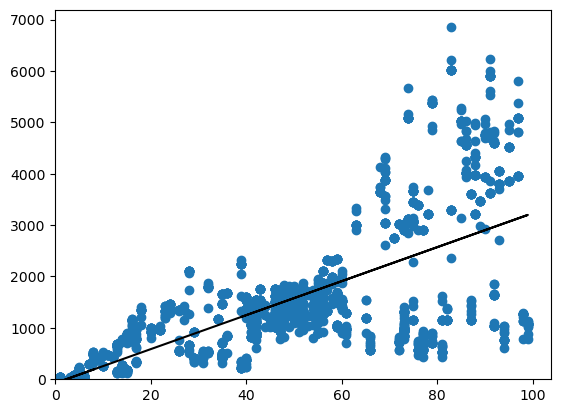

In [13]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

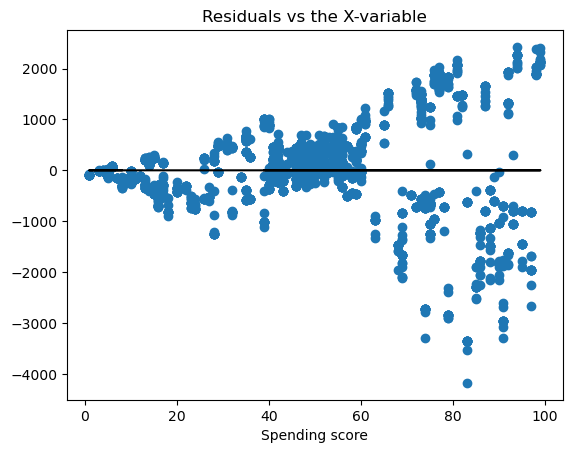

In [14]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally there should be no pattern in this plot.
plt.scatter(x, test.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs the X-variable")
plt.xlabel("Spending score")
plt.show()

In [15]:
# Import the necessary library to check for heteroscedasticity.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 629.982336021591, 'LM Test p-value': 5.042699614942813e-139, 'F-stat': 918.7507142907725, 'F-test p-value': 2.3037887924501407e-166}


R-squared is 45.2% so it explains less than half of the variation in the relationship between loyalty and spending. By looking at the coefficient on X (spending), we can interpret it by saying that an increase in spending by one unit corresponds to a 33 average increase in loyalty points.
We tested that there was a linear relationship between loyalty and spending, and we also tested that the 
LM test p-value is lower than significance level of 0.05, therefore we are unable to reject the null hypothesis of homoscedacisticity, therefore we have heteroscedasticity. This means that the interpretation of the regression coefficient above is not reliable.

### 5b) renumeration vs loyalty

In [16]:
# Independent variable.
x = reviews['remuneration']

# Dependent variable.
y = reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        13:15:20   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

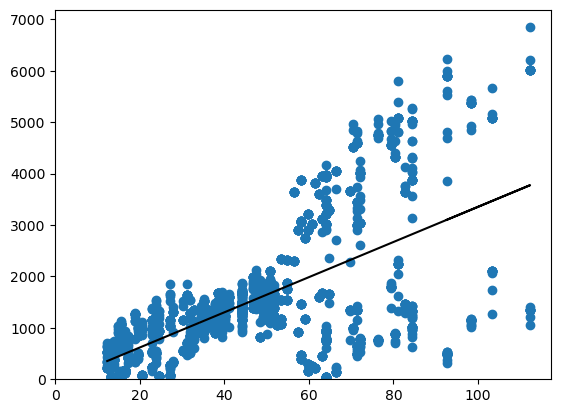

In [19]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [20]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1038.6445487288279, 'LM Test p-value': 7.153051772823832e-228, 'F-stat': 2158.631134421931, 'F-test p-value': 3.68e-320}


The R-squared of the model comparing remuneration and loyalty is lower than in the case of spending and loyalty, meaning that it explains comparitively less about the relationship between the two. Additionally, the Breusch-Pagan test shows that we fail to reject the hypothesis of homoscedasticity, meaning that there is heteroscedasticity in the residuals, furhter undermining the validity of the model.

### 5c) age vs loyalty

In [21]:
# Independent variable.
x = reviews['age']

# Dependent variable.
y = reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 02 Oct 2023   Prob (F-statistic):             0.0577
Time:                        13:15:20   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.517739 + (-4.012805) * reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

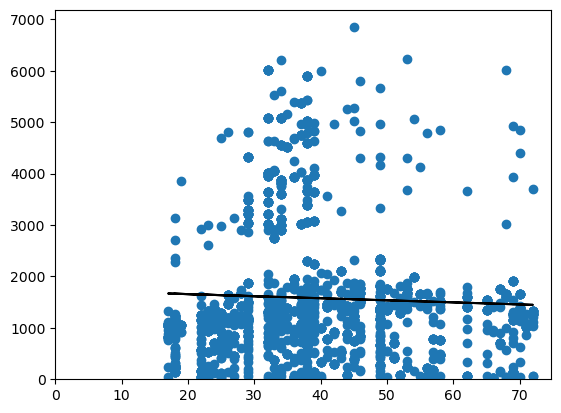

In [24]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [25]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 13.045150861307642, 'LM Test p-value': 0.00030407066519251314, 'F-stat': 13.11766668084642, 'F-test p-value': 0.0002998192355800465}


The R-squared of the model comparing age and loyalty is very low, meaning that it explains very little about the relationship between the two, and this is further demonstrated by the absence of a linear relationship between loyalty and age (scatterplot). Additionally, the Breusch-Pagan test shows that we fail to reject the hypothesis of homoscedasticity, meaning that there is heteroscedasticity in the residuals, furhter undermining the validity of the model.

## 6. Observations and insights

None of the three linear regression models are satisfactory - they all present heteroscedasticity which makes the any interpretation of the regression coefficients unreliable. What could be done to fix this is, for example, to use weighted least squares regression by assigning a weight to each data point based on the variance of the predicted values (smaller weights to data points with higher variances). Another method could be to transform the dependent variable by taking its log or square root to rescale the data and pull in the extreme data points.

# B) Segmenting customers with *k*-means clustering

This section will identify groups within the customer base that can be used to target specific market segments. *k*-means clustering will be used to select the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [28]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [29]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [30]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

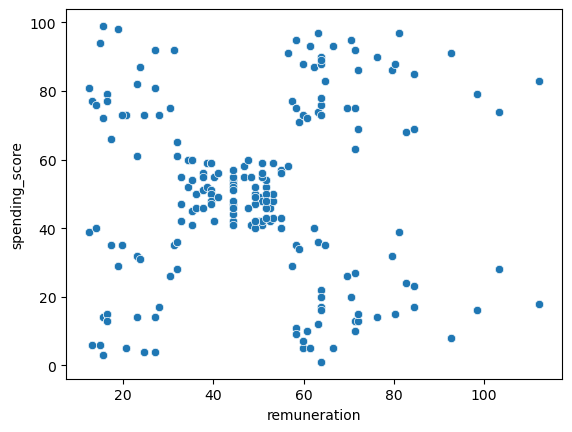

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=df2)

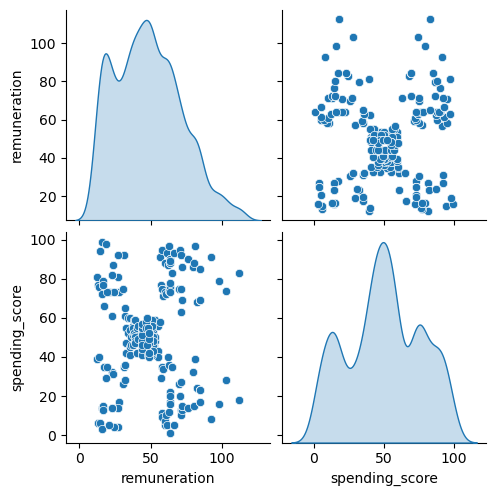

In [32]:
# Create a pairplot with Seaborn.
x = df2

sns.pairplot(df2, vars=x, diag_kind='kde')

To the naked eye, we can see that at least 5 clusters are likely to exist when looking at the spending and remuneration features - we'll use the Elbow and Silhouette methods to better determine the exact number to use.

## 3. Elbow and silhoutte methods

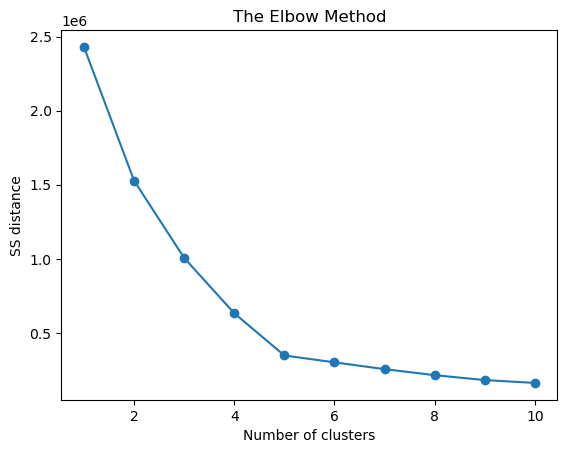

In [33]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

According to the Elbow method, we can see that between 5 and 7 clusters could be considered for use in the model. This is determined by looking at where the chart creates an "elbow" like shape, meaning that the SS distance is being drastically reduced.

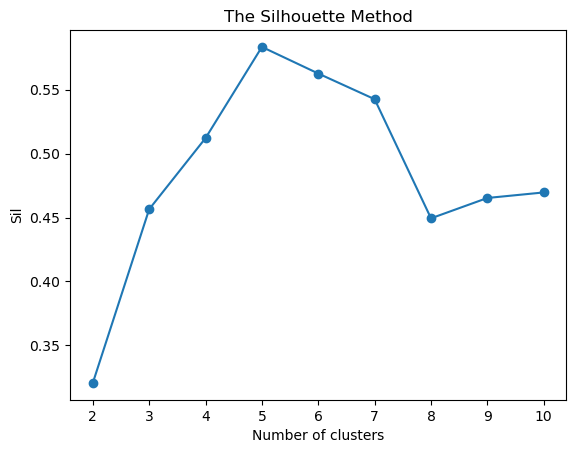

In [34]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

According to the Silhouette method, the optimal number of clusters to be considered is again between 5 and 7, which correspond to the peaks in the chart.

## 4. Evaluate k-means model at different values of *k*

### Five clusters

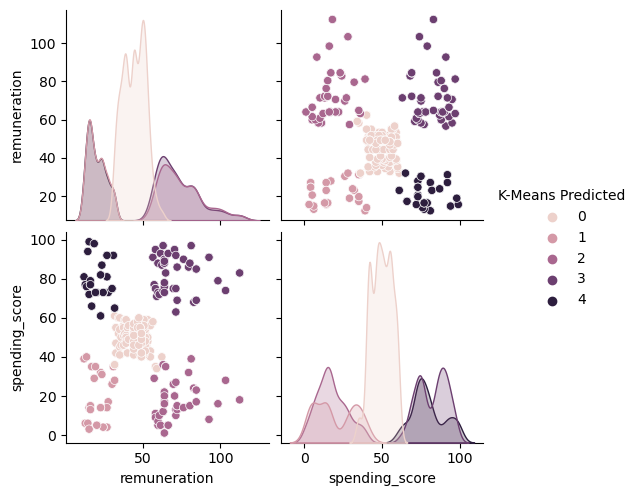

In [35]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [36]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
3    356
2    330
1    271
4    269
Name: count, dtype: int64

### Six clusters

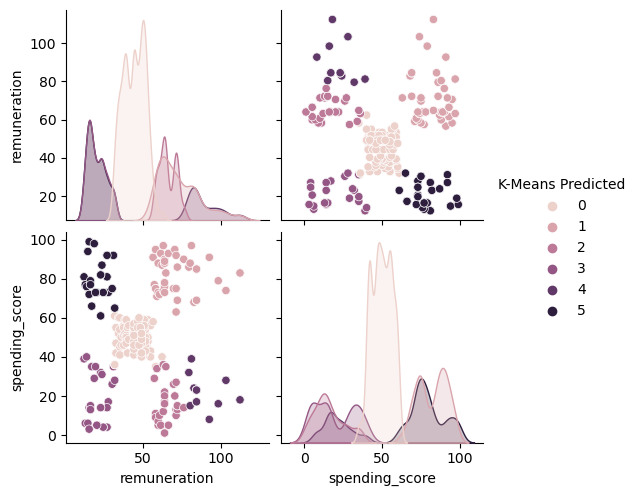

In [37]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [38]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    767
1    356
3    271
5    269
2    214
4    123
Name: count, dtype: int64

### Seven clusters

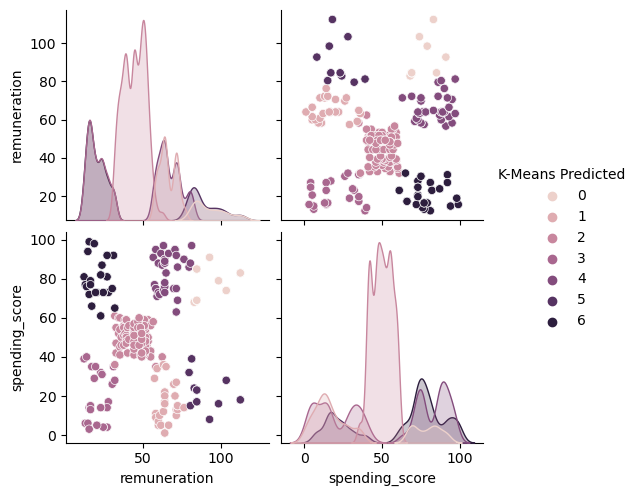

In [39]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, max_iter = 15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [40]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: count, dtype: int64

Having evaluated the three values of k (5, 6, 7) and in view of the results of the Elbow and Silhouette methods point to 5 as a desirable value, we choose to move forward with k=5 as the selected value. Six and seven clusters appear to be dissecting the data too much, leading to extremely divergence predicted class sizes and a danger of overfitting the model.

## 5. Fit final model and justify your choice

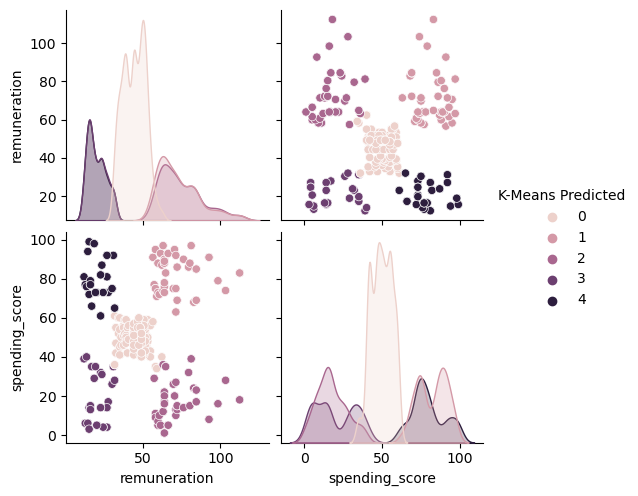

In [41]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [42]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
1    356
2    330
3    271
4    269
Name: count, dtype: int64

## 6. Plot the clusters

Text(0.5, 1.0, 'Spending score 1-100 vs Remuneration (k£)')

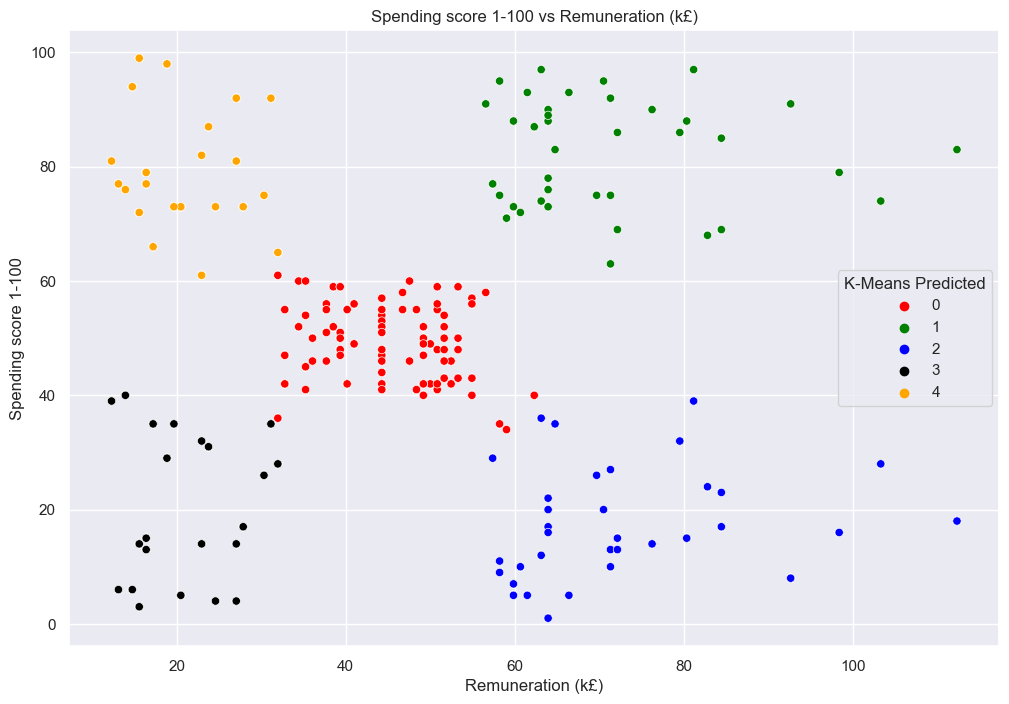

In [43]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , y ='spending_score', data=df2 , hue='K-Means Predicted', 
                palette=['red', 'green', 'blue', 'black', 'orange'])

plt.xlabel("Remuneration (k£)")
plt.ylabel("Spending score 1-100")
plt.title("Spending score 1-100 vs Remuneration (k£)")

## 7. Discuss: Insights and observations

The five clusters identified reveal that customers can be classified according to spending score and remuneration into five groups: (1) High spend, high remuneration; (2) Low spend, high remuneration; (3) Low spend, low remuneration; (4) High spend, low remuneration. These groupings are useful from a business point of view as they can be used to target customers according to their spending preferences and remuneration data, for example the business could market a high quality, low convenience item to segment (4), or a low quality, high convenience item to segment (2).

# C) Natural Language Processing on social data

Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns.

## 1. Load and explore the data

In [44]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [46]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [47]:
# Keep necessary columns. Drop unnecessary columns.
#df3 = df3.drop(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'], axis=1)
df3 = df3[['review', 'summary']]


# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [48]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [49]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [50]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [51]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [52]:
# Replace all the punctuations in review column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2c) Drop duplicates in both columns

In [53]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame shape.
df3.shape

(1975, 2)

## 3. Tokenise and create wordclouds

In [54]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy(deep=True)

# View DataFrame.
df4.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [55]:
# Apply tokenisation to both columns.
df4['review'] = df4['review'].apply(word_tokenize)
df4['summary'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4.head()

,review,summary
0,"[when, it, comes, to, a, dm, 's, screen, ,, th...","[the, fact, that, 50, %, of, this, space, is, ..."
1,"[an, open, letter, to, galeforce9, *, :, your,...","[another, worthless, dungeon, master, 's, scre..."
2,"[nice, art, ,, nice, printing, ., why, two, pa...","[pretty, ,, but, also, pretty, useless]"
3,"[amazing, buy, !, bought, it, as, a, gift, for...","[five, stars]"
4,"[as, my, review, of, gf9, 's, previous, screen...","[money, trap]"


In [56]:
#Concatenate lists in review column together:
#Create empty list first:
review_tok = []

for word in df4['review']:
    # Add each word to the string.
    review_tok = review_tok + word + []

In [57]:
#Repeat the same process for the summary column:
summary_tok = []

for word in df4['summary']:
    # Add each word to the string.
    summary_tok = summary_tok + word + []

In [58]:
#Transform the list of review_tok and summary_tok into strings:
review_str = ' '.join(review_tok)
summary_str = ' '.join(summary_tok)

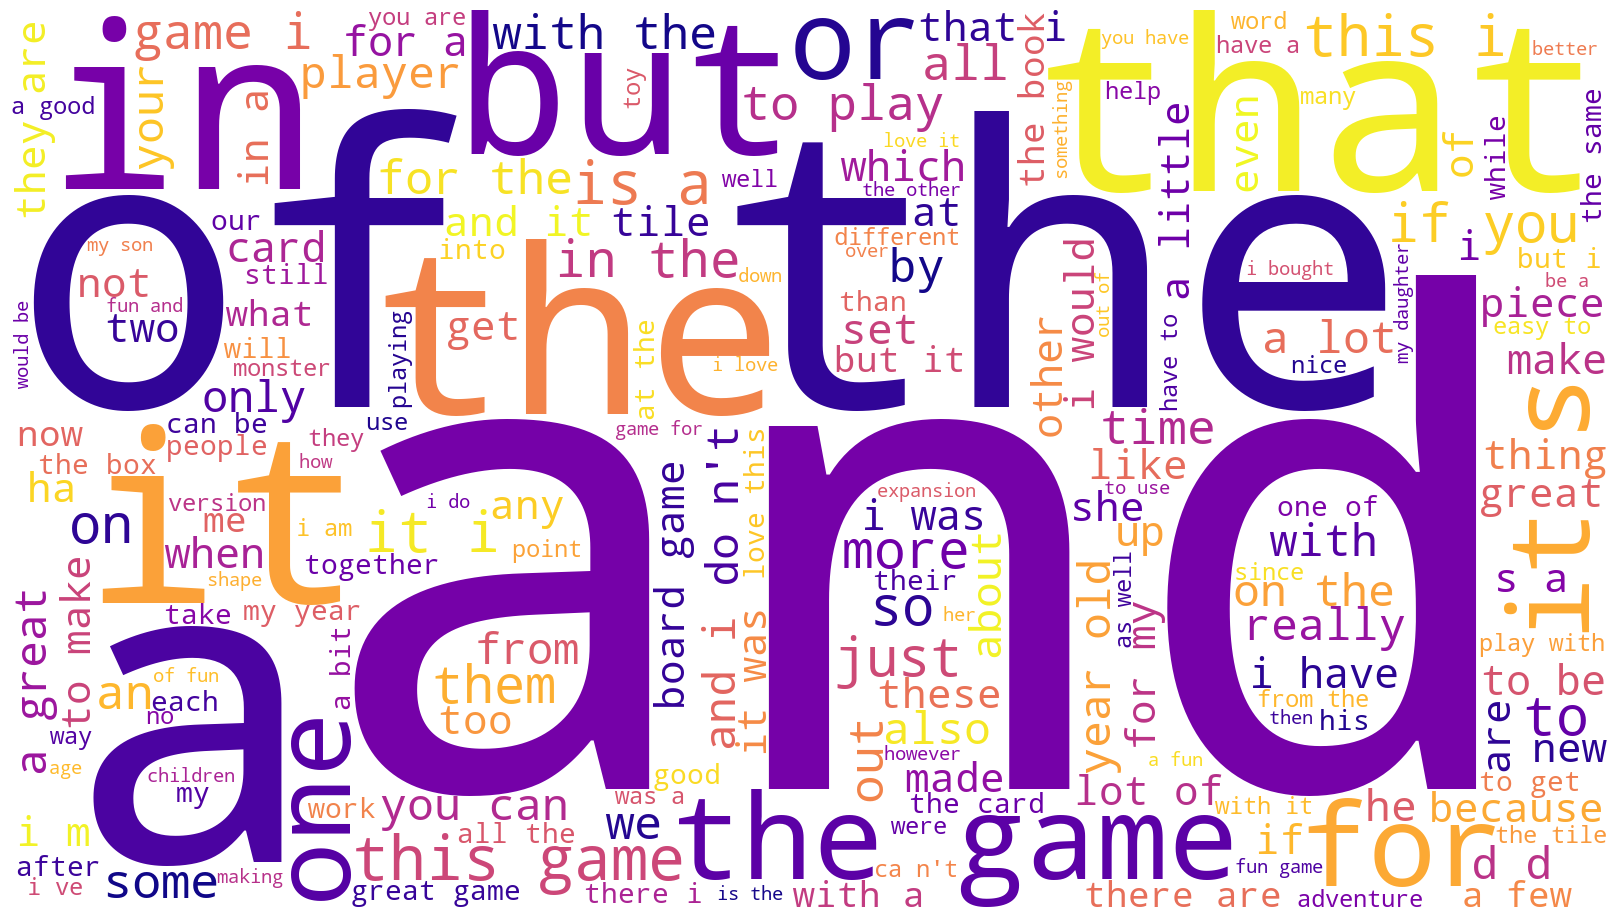

In [59]:
# Review: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_r = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_str)

# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_r) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

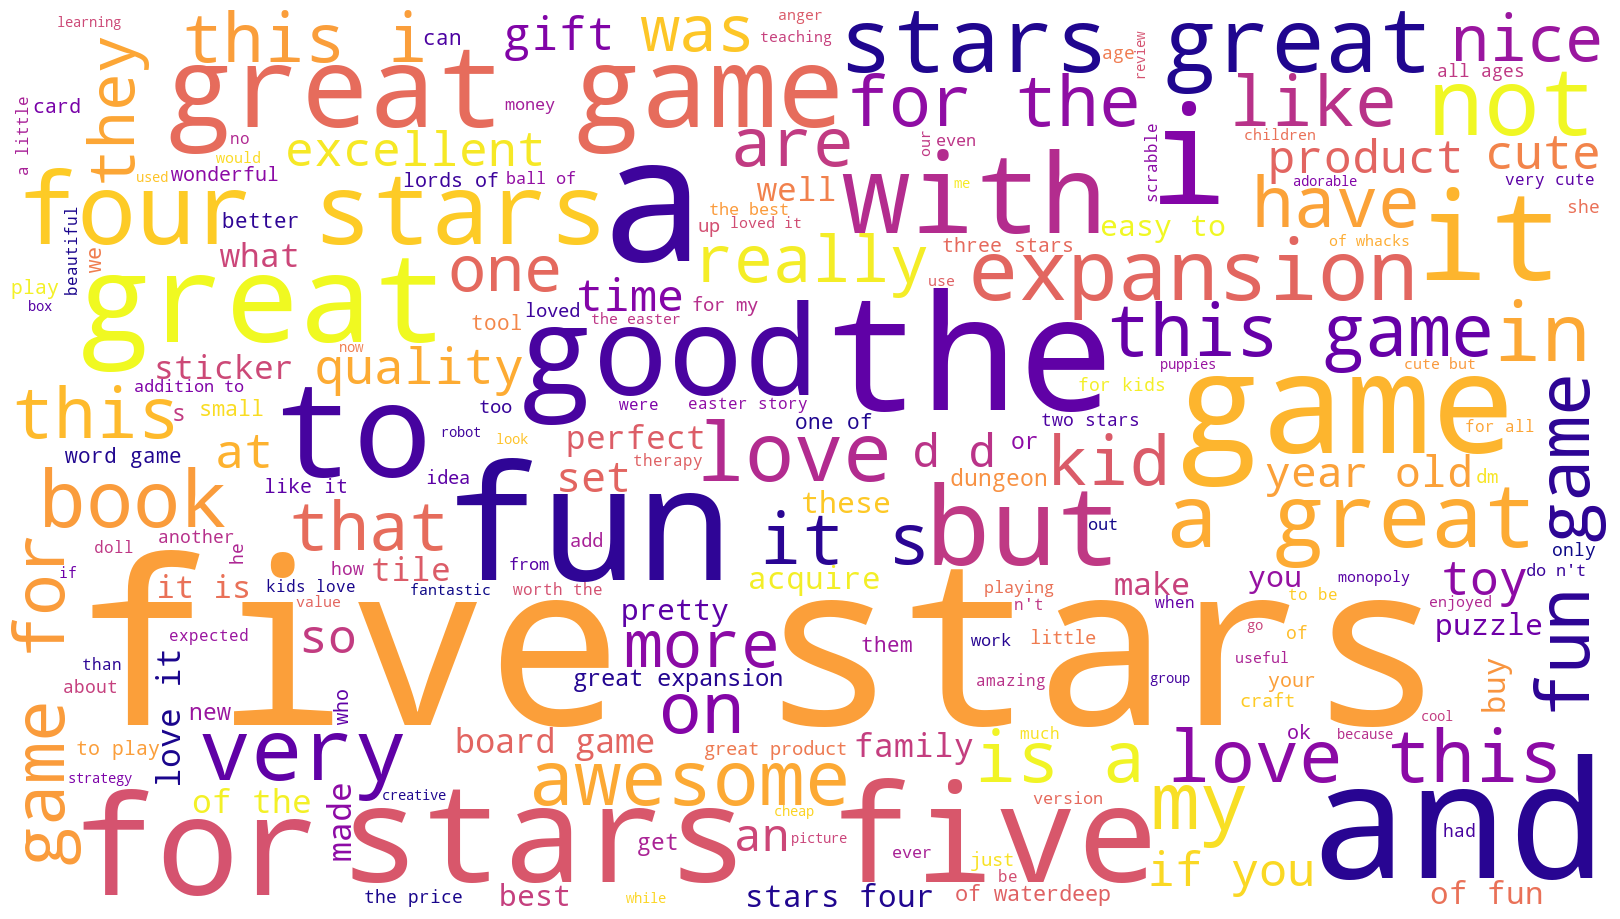

In [60]:
# Summary: Create a word cloud.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_s = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_str)


# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_s) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Both word clouds show us the most common words in both review and summary columns. However, we can still see stopwords (e.g. 'and', 'the', 'that') which don't add meaning to our interpretation - we will address this in the following steps.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [61]:
# Calculate the review frequency distribution.
fdist_rev = FreqDist(review_tok)

# Preview data.
fdist_rev

FreqDist({'.': 6470, 'the': 5457, ',': 3793, 'and': 3247, 'a': 3169, 'to': 3163, 'of': 2491, 'it': 2488, 'i': 2345, 'is': 1834, ...})

In [62]:
# Calculate the review frequency distribution.
fdist_sum = FreqDist(summary_tok)

# Preview data.
fdist_rev

FreqDist({'.': 6470, 'the': 5457, ',': 3793, 'and': 3247, 'a': 3169, 'to': 3163, 'of': 2491, 'it': 2488, 'i': 2345, 'is': 1834, ...})

As per word clouds above, we can see that stopwords and punctuation are prominent, so we will remove them in the following step.

### 4b) Remove alphanumeric characters and stopwords

In [63]:
# Delete all the alpanum.
review_tok2 = [word for word in review_tok if word.isalnum()]
summary_tok2 = [word for word in summary_tok if word.isalnum()]

In [64]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tok2 = [x for x in review_tok2 if x.lower() not in english_stopwords]
summary_tok2 = [x for x in summary_tok2 if x.lower() not in english_stopwords]

### 4c) Create wordcloud without stopwords

In [65]:
# Define an empty string variable to store the filtered list from the review column.
review_tok2_str = ''

for value in review_tok2:
    # Add each filtered token word to the string.
    review_tok2_str = review_tok2_str + value + ' '

In [66]:
# Define an empty string variable to store the filtered list from the summary column.
summary_tok2_str = ''

for value in summary_tok2:
    # Add each filtered token word to the string.
    summary_tok2_str = summary_tok2_str + value + ' '

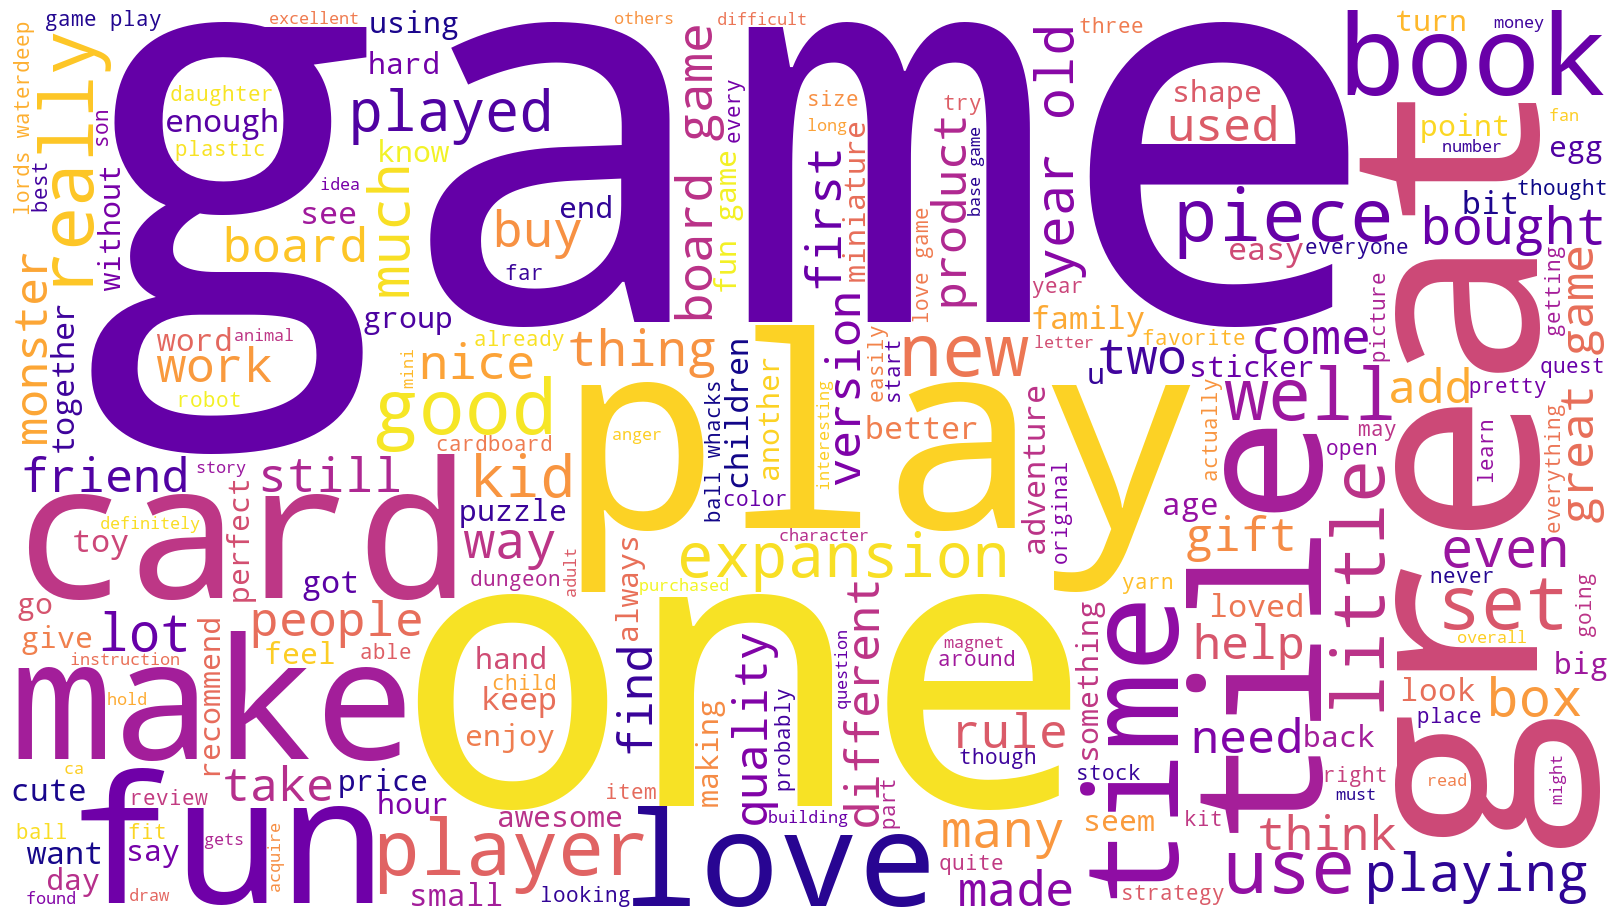

In [67]:
# Review: Create a wordcloud without stop words.
wordcloud_rev = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tok2_str) 

# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

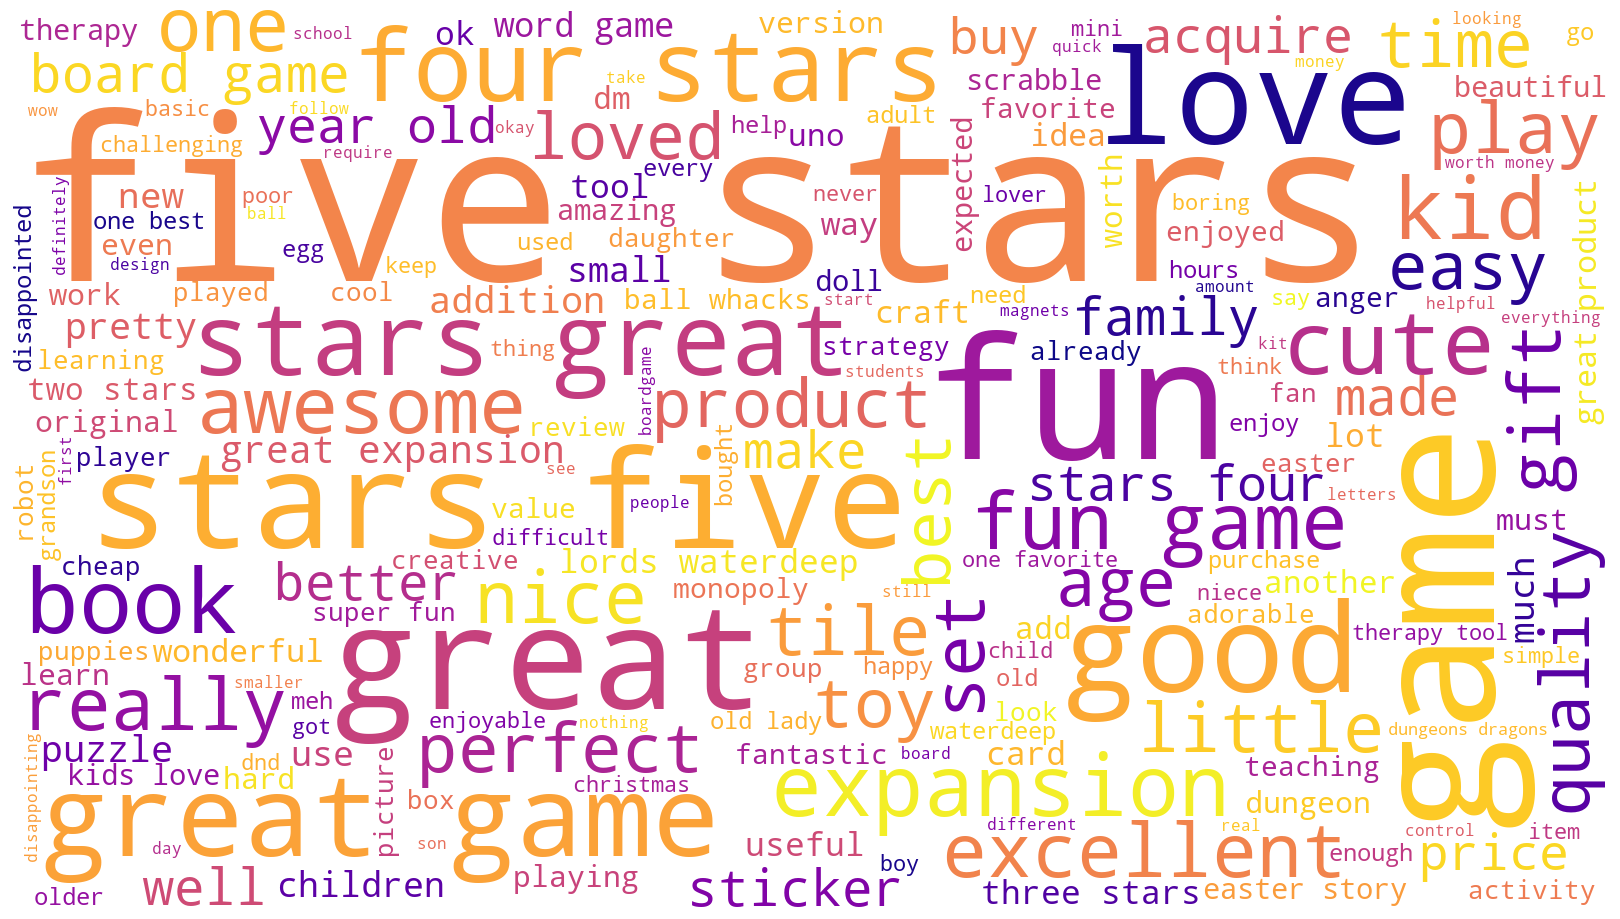

In [68]:
# Summary: Create a wordcloud without stop words.
wordcloud_sum = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tok2_str) 

# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [69]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter for both review and summary.
counts_rev = pd.DataFrame(Counter(review_tok2).most_common(15),
                      columns=['Word', 'Frequency'])

counts_sum = pd.DataFrame(Counter(summary_tok2).most_common(15),
                      columns=['Word', 'Frequency'])

In [70]:
# Define function to generate polarity.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [71]:
# Generate polarity for top 15 most common words (Review)
counts_rev['polarity'] = counts_rev['Word'].apply(generate_polarity)
counts_rev

,Word,Frequency,polarity
0,game,1693,-0.4
1,great,587,0.8
2,fun,555,0.3
3,one,532,0.0
4,play,504,0.0
5,like,414,0.0
6,love,325,0.5
7,get,320,0.0
8,really,318,0.2
9,cards,301,0.0


In [72]:
# Generate polarity for top 15 most common words (Summary)
counts_sum['polarity'] = counts_sum['Word'].apply(generate_polarity)
counts_sum

,Word,Frequency,polarity
0,stars,441,0.0
1,five,356,0.0
2,game,318,-0.4
3,great,294,0.8
4,fun,217,0.3
5,love,93,0.5
6,good,92,0.7
7,four,58,0.0
8,like,54,0.0
9,expansion,52,0.0


By looking at the most frequently used words, we can see that "game" ranks high in both reviews and summaries, and it is classified as having a negative sentiment score. Stakeholders should be aware of this limitation - given that the company's business is primarily in games, the frequency of the word "game" is not surprising and for this reason it should probably be excluded from the sentiment analysis.

Whilst reviewing polarity for the most common words might provide a high level insight on the direction of the sentiment, it would be more helpful to consider the entire sentence to have better context. We will be addressing that in the following step.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [73]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for each comment.
df3['polarity_review'] = df3['review'].apply(generate_polarity)
df3['polarity_summary'] = df3['summary'].apply(generate_polarity)

# View output
df3.head()

,review,summary,polarity_review,polarity_summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...,-0.036111,0.15
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...,0.035952,-0.80
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless",0.116640,0.00
3,amazing buy! bought it as a gift for our new d...,five stars,0.628788,0.00
4,as my review of gf9's previous screens these w...,money trap,-0.316667,0.00


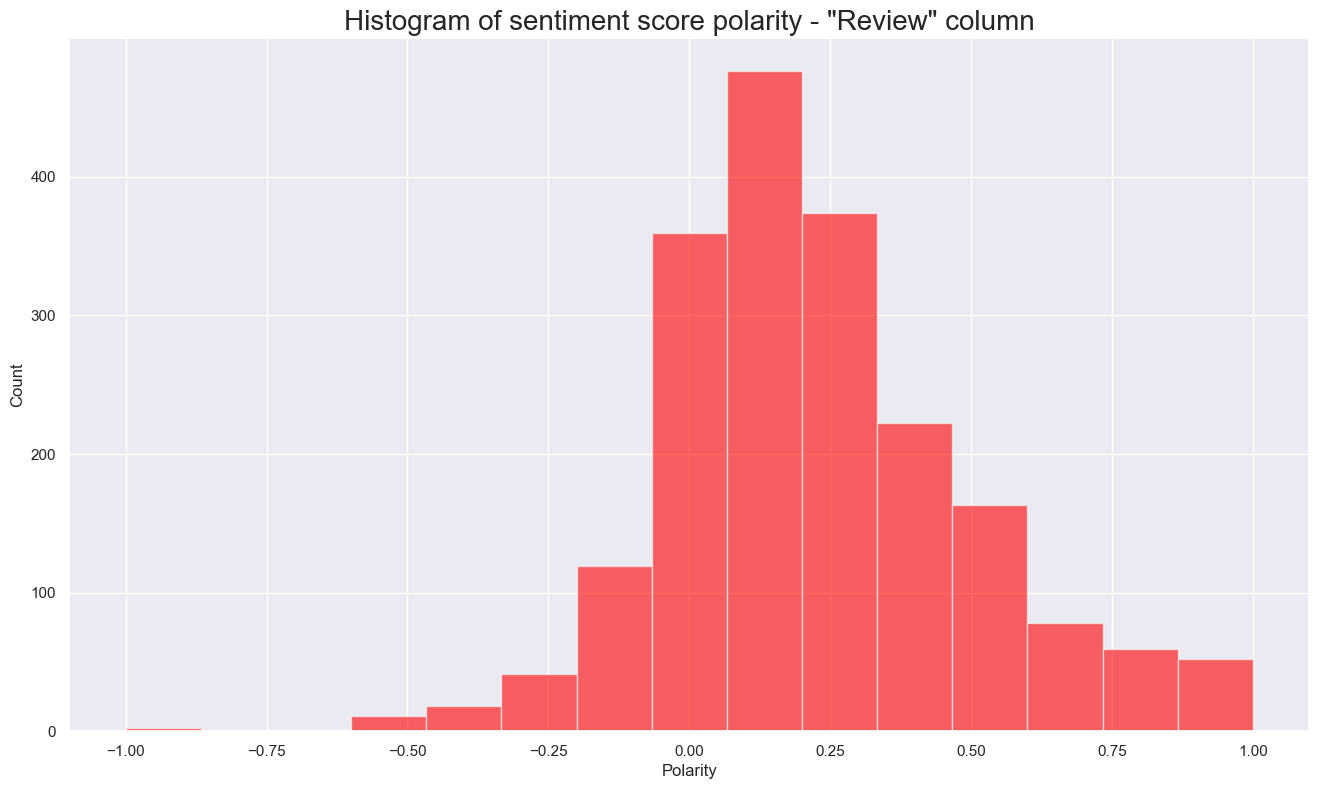

In [74]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - "Review" column', fontsize=20)

plt.show()

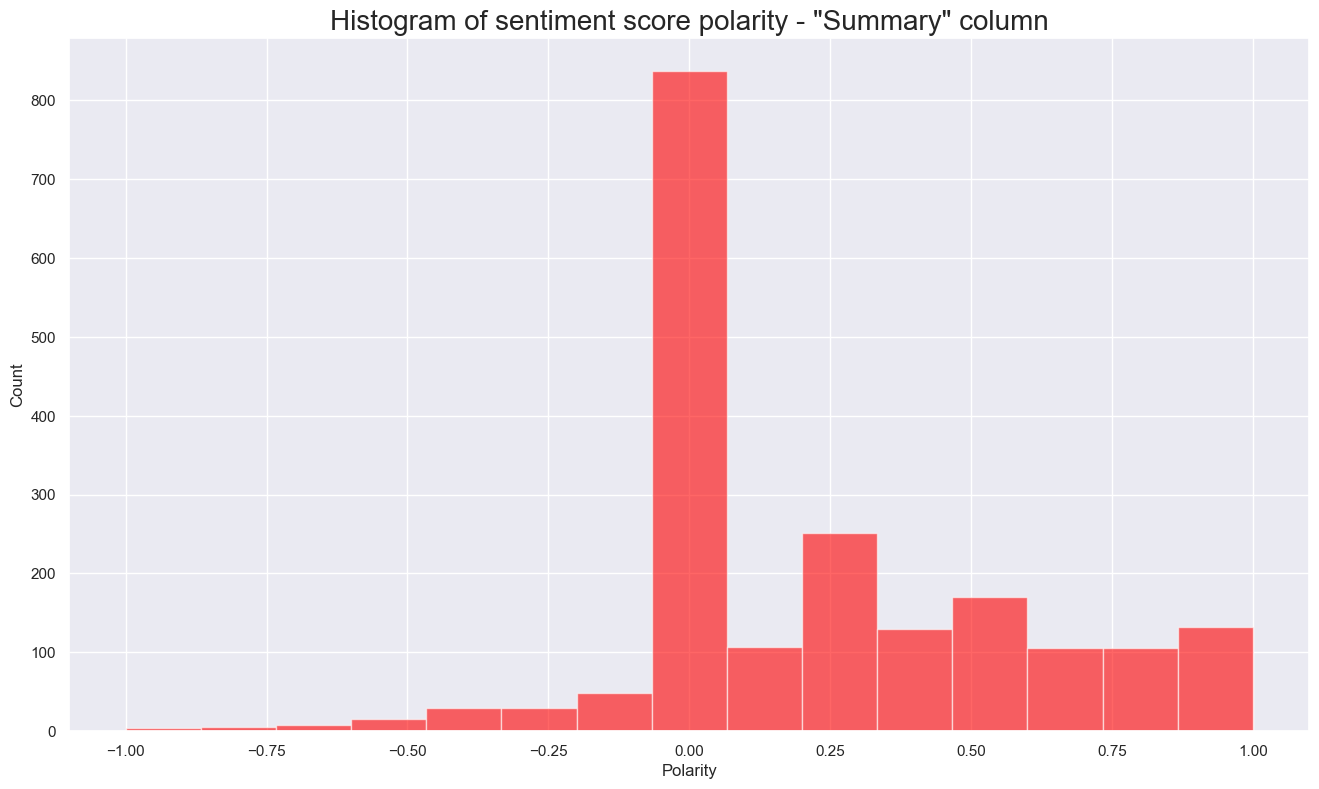

In [75]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - "Summary" column', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [76]:
# Top 20 negative reviews.
negative_sentiment_review = df3.nsmallest(20, 'polarity_review')

# View output.
negative_sentiment_review.sort_values(by=['polarity_summary'])

,review,summary,polarity_review,polarity_summary
208,booo unles you are patient know how to measure...,boring unless you are a craft person which i a...,-1.000000,-1.00
1804,i'm sorry. i just find this product to be bori...,disappointing,-0.583333,-0.60
364,"one of my staff will be using this game soon, ...",anger control game,-0.550000,-0.55
437,this game although it appears to be like uno a...,this game although it appears to be like uno a...,-0.400000,-0.40
427,kids i work with like this game.,four stars,-0.400000,0.00
306,very hard complicated to make these.,one star,-0.439583,0.00
538,i purchased this on the recommendation of two ...,hmmm????,-0.440741,0.00
347,my 8 year-old granddaughter and i were very fr...,frustating!!!,-0.452500,0.00
174,i sent this product to my granddaughter. the p...,faulty product,-0.491667,0.00
1829,scrabble in a card game!,five stars,-0.500000,0.00


In [77]:
# Top 20 negative summaries.
negative_sentiment_summary = df3.nsmallest(20, 'polarity_summary')

# View output.
negative_sentiment_summary.sort_values(by=['polarity_review'])

,review,summary,polarity_review,polarity_summary
208,booo unles you are patient know how to measure...,boring unless you are a craft person which i a...,-1.000000,-1.000
178,at age 31 i found these very difficult to make...,at age 31 i found these very difficult to make...,-0.275000,-0.650
1620,"i was thinking it was a puppet but it is not, ...",disappointed,-0.218750,-0.750
890,"the game tiles, board, and tile stands are all...",bad quality-all made of paper,-0.162500,-0.700
1166,before this i hated running any rpg campaign d...,before this i hated running any rpg campaign d...,-0.133333,-0.900
363,i found that this card game does the opposite ...,promotes anger instead of teaching calming met...,-0.126190,-0.700
101,the book is only 4 pages and it's about the si...,small and boring,-0.075000,-0.625
793,my mom already owned an acquire game but she a...,disappointed,-0.046364,-0.750
1015,i wish i'd watched some of the gameplay videos...,disappointing.,-0.024755,-0.600
1115,"i had high hopes for this game, as i am a big ...",disappointing,-0.021468,-0.600


In [78]:
# Top 20 positive reviews.
positive_sentiment_review = df3.nlargest(20, 'polarity_review')

# View output.
positive_sentiment_review.sort_values(by=['polarity_summary'], ascending=False)

,review,summary,polarity_review,polarity_summary
804,great!!,great !!,1.0,1.0
620,great easter gift for kids!,great easter gift for kids!,1.0,1.0
418,great resource for bhis care coordinators!! wo...,perfect!,1.0,1.0
474,great seller!!! happy with my purchase!!! 5 st...,great for kids,1.0,0.8
685,these are great!,cute letters,1.0,0.5
517,great therapy tool!,five stars,1.0,0.0
621,wonderful for my grandson to learn the resurre...,five stars,1.0,0.0
609,delightful product!,five stars,1.0,0.0
591,wonderful product,five stars,1.0,0.0
524,"perfect, just what i ordered!!",five stars,1.0,0.0


In [79]:
# Top 20 positive summaries.
positive_sentiment_summary = df3.nlargest(20, 'polarity_summary')

# View output.
positive_sentiment_summary.sort_values(by=['polarity_review'], ascending=False)

,review,summary,polarity_review,polarity_summary
418,great resource for bhis care coordinators!! wo...,perfect!,1.000000,1.0
457,this is a great product! i use it as a therape...,this is a great product! i use it as a therape...,0.890000,1.0
37,great buy! can't wait to work on this book. th...,great buy! can't wait to work on this book,0.750000,1.0
32,awesome! my 8 year old's favorite xmas gift! i...,perfect!,0.692188,1.0
6,"i have bought many gm screens over the years, ...",best gm screen ever,0.660000,1.0
28,these are intricate designs for older children...,wonderful designs.,0.541667,1.0
163,this was a christmas present for a nephew who ...,he was very happy with his gift,0.500000,1.0
80,my daughter loves these little books. they're ...,they're the perfect size to keep in the car or...,0.406250,1.0
140,i bought 8 of these for my 3 year old daughter...,awesome sticker activity for the price,0.389583,1.0
202,this gift was loved and the recipient created ...,great!,0.371875,1.0


## 7. Discuss: Insights and observations

Overall, both reviews and summaries register sentiment that is positively skewed, as shown in the histograms for polarity. There appears to be a greater concentration of reviews classed as positive sentiment than there are summaries, which on the other hand have a high concentration of neutral sentiment. 

To better investigate the results of the sentiment classification, we have looked at the top and bottom 20 reviews and summaries. At first glance, we can immediately see some of the limitations in the approach: there is no solid correlation between positive sentiment in reviews and positive sentiment in summaries, as one would expect. When looking at the top 20 positive summaries, we can also see that five stars is classed as neutral sentiment, when in fact a human observer would class it as positive sentiment.

As a recommended next step, it would be insightful to understand which products and type of clients are associated with the most negative and the most positive reviews (due to the "stars" issue, we would advise looking focusing on the reviews instead), to determine whether any patterns can be identified in relation to the product itself or a specific customer segment.